# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [6]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [7]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [8]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/anna/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


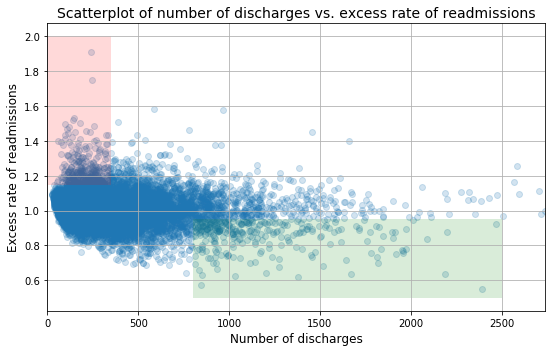

In [9]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

#### A. Do you agree with the above analysis and recommendations? Why or why not?

No, we have merely looked at the correlation between the two without taking into consideration other factors that could affect number of discharges and/or readmission rates.

####  B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

*Setup an appropriate hypothesis test.*

null hypothesis: there is no significant correlation between hospital capacity and readmission rates

alternative hypothesis: there is a significant negative correlation between hospital capacity and readmission rates

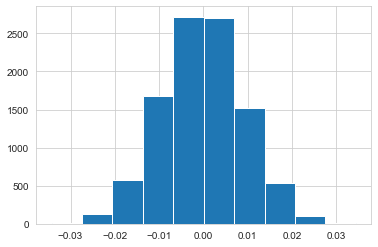

oberserved correlation between hospital capacity and excess readmission ratio: -0.09740
p-value: 0.0000000000


In [55]:
#Compute and report the observed significance value (or p-value).

#bootstrap
df = clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']]
df=df.dropna(how='any')

x1=df['Number of Discharges']
y1=df['Excess Readmission Ratio']

df_corr=np.corrcoef(x1,y1)[0][1]

corr_replicates=np.empty(10000)

for i in range(10000):
    x_perm=np.random.permutation(x1)
    corr_replicates[i]=np.corrcoef(x_perm,y1)[0][1]

_=plt.hist(corr_replicates)
plt.show()


p_val = (np.sum(corr_replicates<=df_corr))/10000

print('oberserved correlation between hospital capacity and excess readmission ratio: %.5f'%df_corr)
print('p-value: %.10f' % p_val)


In [42]:
#Report statistical significance for  𝛼  = .01

##We have two p-values we can test this with--the p-value we get from bootstrapping and a p-value we can get 
##using scipy.stats.pearsonr()


import scipy.stats as stats
alpha=0.01

if p_val>alpha:
    print ('we fail to reject the null')
else:
    print('we reject the null')
    
if stats.pearsonr(x1,y1)[1]>alpha:
    print ('we fail to reject the null')
else:
    print('we reject the null')

we reject the null
we reject the null


As we can see, we reject the null at a 1% significance level for both. 

#### Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

By bootstrapping, we see that the negative correlation between number of discharges and the excess readmission ratio is statistically significant at the 1% level. Although, statistical significance does not automatically mean that there is also practical significance. To determine this, we take a look into whether or not this correlation is large enough to be of value in a practical sense. Is a -0.097 correlation enough to convince us that we need to look into improving hospital capacity to tackle the problem of excess readmission ratio? I don't believe it is. I would recommend the client to look into other factors that could have greater impacts on the readmission ratio.


#### Look at the scatterplot above.
What are the advantages and disadvantages of using this plot to convey information?
Construct another plot that conveys the same information in a more direct manner.

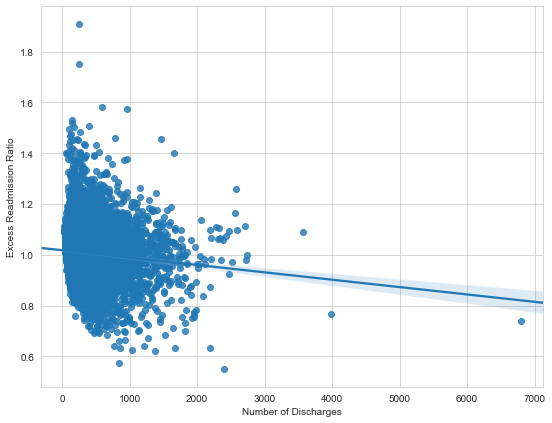

In [56]:
#reproduce the original scatterplot above

import seaborn as sns

sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(9,7))
_=sns.regplot(x=x1,y=y1,ax=ax)

When we take out the three outliers (x>3500), the plot tells a different story. We now see that the correlation between the two doesn't seem as big as suggested by the plot above. 

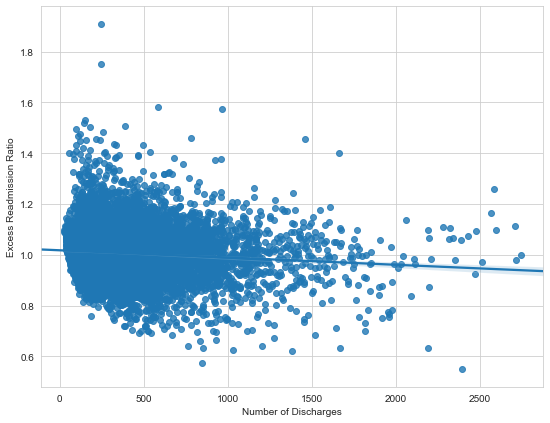

In [54]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(9,7))
_=sns.regplot(x=x1[:-3],y=y1[:-3],ax=ax)